# Actividad 1

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

### Cargar Imagen en Grayscale

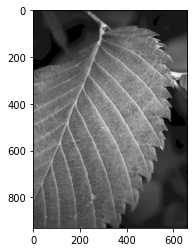

In [15]:
def loadImage(url):
    return cv.imread(url, cv.IMREAD_GRAYSCALE)

img = loadImage('./Image.png')
plt.imshow(img, cmap="gray")